In [ ]:
import numpy as np
import pycbc.noise
import pycbc.psd
%matplotlib widget





Generating waveform using pycbc.waveform module.

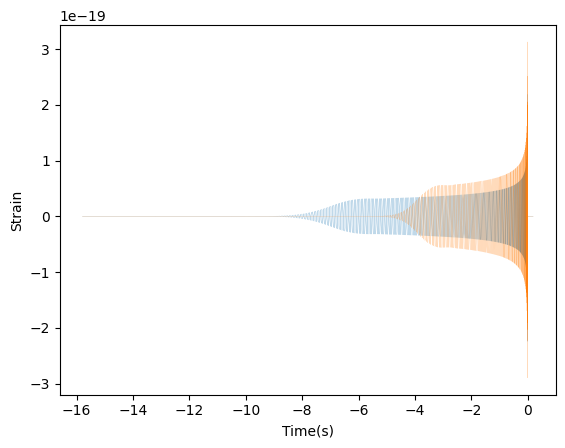

In [46]:
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt

hp1, hc1 = get_td_waveform(approximant='IMRPhenomD', mass1=10, mass2=10, delta_t=1/4096, f_lower=20)
hp2, hc2 = get_td_waveform(approximant='IMRPhenomD', mass1=10, mass2=20, delta_t=1/4096, f_lower=20)

plt.plot(hp1.sample_times, hp1, label='IMRPhenomD', linewidth=0.1)
plt.plot(hp2.sample_times, hp2, label='IMRPhenomD', linewidth=0.1)
plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.show()

Calculating the antenna pattern for a particular detector given RA, Dec and polarization of source. 

In [47]:
from pycbc.detector import Detector

detH1 = Detector('H1')
detL1 = Detector('L1')

ra = 1.25
dec = -2.5

Fplus_H1, Fcross_H1 = detH1.antenna_pattern(ra, dec, polarization=0.3, t_gps=1000000000)
Fplus_L1, Fcross_L1 = detL1.antenna_pattern(ra, dec, polarization=0.3, t_gps=1000000002)


print("Antenna pattern for H1: Fplus_H1=", Fplus_H1, "Fcross_H1=", Fcross_H1 )
print("Antenna pattern for L1: Fplus_L1=", Fplus_L1, "Fcross_L1=", Fcross_L1 )


Antenna pattern for H1: Fplus_H1= 0.005431338646789491 Fcross_H1= 0.11887550471284067
Antenna pattern for L1: Fplus_L1= 0.08422303927417937 Fcross_L1= -0.23669238938526818


Projecting a signal into the detector frame.

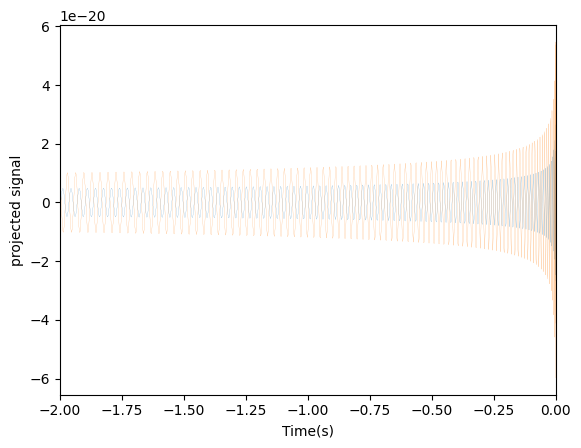

In [50]:
ht1_H1 = Fplus_H1*hp1 + Fcross_H1*hc1
ht1_L1 = Fplus_L1*hp1 + Fcross_L1*hc1



plt.plot(ht1_H1.sample_times, ht1_H1, linewidth=0.1)
plt.plot(ht1_L1.sample_times, ht1_L1, linewidth=0.1)

plt.xlim(-2, 0)
plt.xlabel("Time(s)")
plt.ylabel("projected signal")
plt.show()




Generating noise.

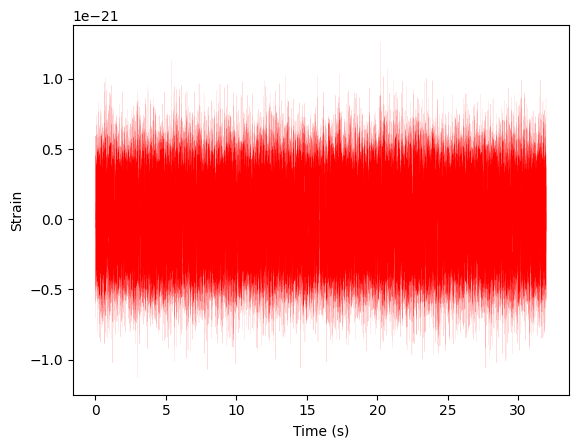

In [35]:
import pycbc.noise
import pycbc.psd
import matplotlib.pyplot as plt


flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)


delta_t = 1.0 / 4096
sample_times = int(32 / delta_t)
ts = pycbc.noise.noise_from_psd(sample_times, delta_t, psd, seed=124)

plt.plot(ts.sample_times, ts, color='red', linewidth=0.05)
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.show()

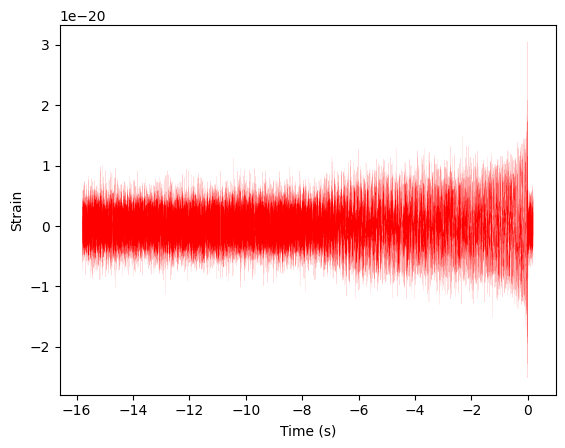

In [57]:
signal = ht1_H1 + 10*ts[0:len(ht1_H1)].numpy()

plt.plot(signal.sample_times, signal, color='red', linewidth=0.05)
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.show()

In [54]:
print(len(ht1_H1))

65536


In [55]:
print(len(ts))

131072
